# Data collected from https://rebrickable.com/downloads/ and is current as of Nov. 21, 2024, 7:08 a.m.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import re

In [3]:
inventories = pd.read_csv('../data/inventories.csv')
inventory_minifigs = pd.read_csv('../data/inventory_minifigs.csv')
inventory_parts = pd.read_csv('../data/inventory_parts.csv')
inventory_sets = pd.read_csv('../data/inventory_sets.csv')
part_categories = pd.read_csv('../data/part_categories.csv')
parts = pd.read_csv('../data/parts.csv')
sets = pd.read_csv('../data/sets.csv')
themes = pd.read_csv('../data/themes.csv')

In [4]:
df1a = pd.merge(sets, themes, 
                               left_on = 'theme_id', right_on = 'id', 
                               how = 'left')
df1a.rename({'name_x': 'set_title',  
           'name_y': 'theme'},  
          axis = "columns", inplace = True) 
df1a.drop('id', axis=1, inplace=True)

In [5]:
df2a = pd.merge(df1a, inventory_sets,
                               left_on = 'set_num', right_on = 'set_num',
                               how = 'left')
df2a.rename({'quantity': 'inv_quant'},  
          axis = "columns", inplace = True) 

In [6]:
df3a = pd.merge(inventories, inventory_minifigs,
                               left_on = 'id', right_on = 'inventory_id',
                               how = 'left')
df3a = df3a.groupby('set_num').quantity.count()
df3a = pd.DataFrame(df3a).reset_index()
df3a.rename({'quantity': 'mini_fig_count'},  
          axis = "columns", inplace = True) 

In [7]:
story_1_df = pd.merge(df2a, df3a,
                       left_on = 'set_num', right_on = 'set_num',
                       how = 'left')
story_1_df = story_1_df.loc[story_1_df['num_parts'] > 0]

In [8]:
df1b = pd.merge(parts, part_categories,
                        left_on = 'part_cat_id', right_on = 'id',
                        how = 'left')
df1b.rename({'name_x': 'part_title',  
           'name_y': 'part_type'},  
          axis = "columns", inplace = True) 
df1b.drop('id', axis=1, inplace=True)

In [9]:
df2b = pd.merge(df1b, inventory_parts,
                        left_on = 'part_num', right_on = 'part_num',
                        how = 'left')

In [10]:
df3b = pd.merge(df2b, inventories,
                        left_on = 'inventory_id', right_on = 'id',
                        how = 'left')

In [11]:
story_2_df = pd.merge(df2a, df3b,
                        left_on = 'set_num', right_on = 'set_num',
                        how = 'left')
story_2_df.rename({'img_url_x': 'set_img_url',  
           'img_url_y': 'part_img_url',
            'quantity': 'part_quant'},  
          axis = "columns", inplace = True) 
story_2_df.drop('id', axis=1, inplace=True)

In [12]:
story_1_df.head()

,set_num,set_title,year,theme_id,num_parts,img_url,theme,parent_id,inventory_id,inv_quant,mini_fig_count
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,Activity Books with LEGO Parts,497.0,NaN,NaN,1
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,0
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,Classic Town,50.0,NaN,NaN,3
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,Supplemental,126.0,NaN,NaN,1
5,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg,Supplemental,126.0,NaN,NaN,1


In [13]:
story_2_df.head()

,set_num,set_title,year,theme_id,num_parts,set_img_url,theme,parent_id,inventory_id_x,inv_quant,...,part_title,part_cat_id,part_material,part_type,inventory_id_y,color_id,part_quant,is_spare,part_img_url,version
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,Activity Books with LEGO Parts,497.0,NaN,NaN,...,Weapon Sword / Katana / Shamshir with Capped P...,27.0,Plastic,Minifig Accessories,206820.0,179.0,1.0,False,https://cdn.rebrickable.com/media/parts/elemen...,1.0
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,Tyre Smooth Old Style - Small,29.0,Rubber,Wheels and Tyres,24696.0,7.0,4.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0
2,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,Plate 2 x 4,14.0,Plastic,Plates,24696.0,15.0,4.0,False,https://cdn.rebrickable.com/media/parts/elemen...,1.0
3,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",20.0,Plastic,Bricks Round and Cones,24696.0,15.0,1.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0
4,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,"Turntable 4 x 4 - Old Type Complete, Perfectly...",18.0,Plastic,"Hinges, Arms and Turntables",24696.0,15.0,4.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0


## 1. Look into theme diversity to identify set counts per theme in order to understand what Lego is more likely (and less likely) to produce from Lego Ideas. Goal to identify dominance to assert concentration.

In [15]:
# consider a list
exclude_non_lego = ['Activity Books with LEGO Parts', 'Supplemental', 'System', 'Playhouse', 'Jumbo Bricks', 'Non-fiction Books', 'Storage', 'Universal Building Set', 'Story Books', 'Video Games and Accessories', 'Bulk Bricks', '4.5V', 'Gear', 'Stationary and Office Supplies', 'Key Chain', 'LEGO Brand Store', 'Houseware', 'Other', 'NXT', 'Promotional', 'Building Set with People', 'Educational and Dacta', 'Plush Toys', 'Advent', 'Database Sets', 'HO 1:87 Vehicles', 'Ideas Books']
 
# filter in name column
story_1_df[~story_1_df['theme'].isin(exclude_non_lego)]


,set_num,set_title,year,theme_id,num_parts,img_url,theme,parent_id,inventory_id,inv_quant,mini_fig_count
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,0
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,Classic Town,50.0,NaN,NaN,3
8,0016-1,Castle Mini Figures,1979,189,15,https://cdn.rebrickable.com/media/sets/0016-1.jpg,Classic Castle,186.0,NaN,NaN,3
9,002-1,4.5V Samsonite Gears Motor Set,1965,756,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,Samsonite,365.0,NaN,NaN,0
11,003-1,Master Mechanic Set,1966,756,403,https://cdn.rebrickable.com/media/sets/003-1.jpg,Samsonite,365.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
25565,WISHINGWELL-1,Wishing Well,2013,494,28,https://cdn.rebrickable.com/media/sets/wishing...,Friends,NaN,NaN,NaN,0
25575,XMASTREE-1,Christmas Tree,2019,410,26,https://cdn.rebrickable.com/media/sets/xmastre...,Pick A Model,408.0,NaN,NaN,0
25576,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...,Star Wars,NaN,NaN,NaN,0
25577,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...,Star Wars,NaN,NaN,NaN,0


In [16]:
story_1_df.theme.unique()

array(['Activity Books with LEGO Parts', 'Samsonite', 'Classic Town',
       'Supplemental', 'Classic Castle', 'System', 'Basic Set', 'Icons',
       'Technic', 'Service Packs', 'Playhouse', 'Early Creator', 'Town',
       'Jumbo Bricks', 'Non-fiction Books', 'Universal Building Set',
       'Lion Knights', 'Duplo and Explore', 'Train', 'Bulk Bricks',
       '4.5V', '9V', 'Ultimate Collector Series', 'Hobby Sets',
       'Bionicle', 'Creator Expert', 'World City', 'Discovery',
       'Black Falcons', 'Pirates I', 'Seasonal', 'Trains', 'Christmas',
       'Easter', 'Spider-Man', 'Clikits', 'Thanksgiving',
       'LEGO Brand Store', 'Basketball', 'Hockey', 'Harry Potter',
       'Model Team', 'Airport', 'Other', 'Knights Kingdom II',
       'Modular Buildings', 'Factory', 'Town Plan', 'Fantasy Era',
       'Pirates II', 'Kingdoms', 'Monster Fighters', 'Mini', 'Creator',
       'The Lord of the Rings', 'Desert', 'NXT', 'Construction',
       'Classic', 'Duplo', 'Cars', 'Disney Princess', 

In [17]:
story_1_df.loc[story_1_df['theme'] == 'UCS']

,set_num,set_title,year,theme_id,num_parts,img_url,theme,parent_id,inventory_id,inv_quant,mini_fig_count
18048,76023-1,The Tumbler,2014,698,1869,https://cdn.rebrickable.com/media/sets/76023-1...,UCS,697.0,NaN,NaN,2
18166,76139-1,1989 Batmobile,2019,698,3310,https://cdn.rebrickable.com/media/sets/76139-1...,UCS,697.0,NaN,NaN,6
18191,76161-1,1989 Batwing,2020,698,2363,https://cdn.rebrickable.com/media/sets/76161-1...,UCS,697.0,NaN,NaN,3
18265,76240-1,Batmobile Tumbler,2021,698,2049,https://cdn.rebrickable.com/media/sets/76240-1...,UCS,697.0,NaN,NaN,2
18278,76252-1,Batcave Shadowbox,2023,698,3989,https://cdn.rebrickable.com/media/sets/76252-1...,UCS,697.0,NaN,NaN,7
18696,7784-1,The Batmobile Ultimate Collectors' Edition,2006,698,1045,https://cdn.rebrickable.com/media/sets/7784-1.jpg,UCS,697.0,NaN,NaN,0


In [33]:
sets_per_theme = story_1_df.groupby('theme').count().sort_values('set_num', ascending = False).reset_index()
sets_per_theme

,theme,set_num,set_title,year,theme_id,num_parts,img_url,parent_id,inventory_id,inv_quant,mini_fig_count
0,Star Wars,947,947,947,947,947,947,26,268,268,947
1,Technic,880,880,880,880,880,880,493,55,55,880
2,Friends,604,604,604,604,604,604,21,104,104,604
3,Ninjago,546,546,546,546,546,546,4,28,28,546
4,Bionicle,501,501,501,501,501,501,0,329,329,501
...,...,...,...,...,...,...,...,...,...,...,...
385,Activity Books,1,1,1,1,1,1,1,0,0,1
386,Value Packs,1,1,1,1,1,1,0,0,0,1
387,The Legend of Zelda,1,1,1,1,1,1,0,0,0,1
388,Mini,1,1,1,1,1,1,1,0,0,1


In [41]:
sets_per_theme = sets_per_theme.loc[sets_per_theme['set_num'] > 100]

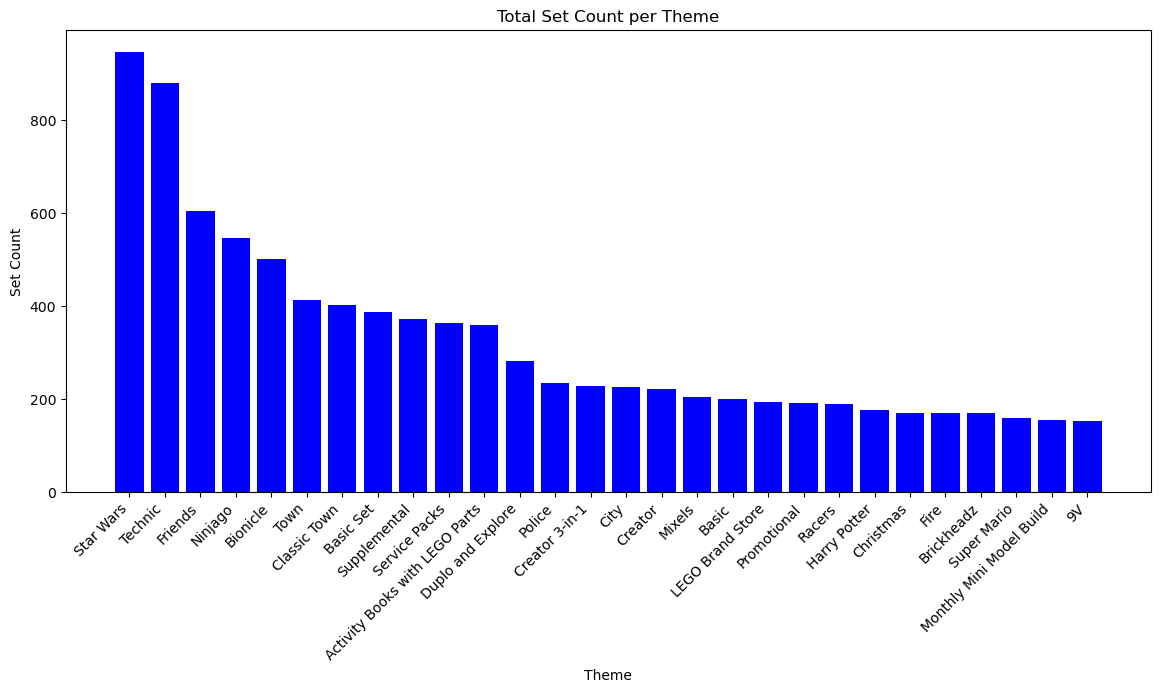

In [43]:
plt.figure(figsize=(14, 6))
plt.bar(sets_per_theme.theme, sets_per_theme.set_num, color="blue") 
plt.ylabel("Set Count")
plt.xlabel("Theme")
plt.title("Total Set Count per Theme")
plt.xticks(rotation=45, ha = 'right')
plt.savefig('top_50_themes_by_set_count.png', bbox_inches = 'tight', transparent=True)
plt.show()

## 2. Look into theme popularity over time via set count, identifying theme progression over time. Due to volume of themes will likely look into top 3-5 and bottom 3-5 using clustered bar charts (maybe up to 10 top/bottom using line charts). Most likely on a yearly (or half-decade/decade bins) basis since there is data all the way back to the 1960s.

## 3a. Identify themes that have endured the tests of time, answering which themes will allways be relevant. Try to identify any factors that may have played into the longevity of the theme popularity.

## 3b. Which themes have the top/bottom available resale sets on ReBrickable? This to show which themes are valuable enough to re-sell, giving insight to which themes to concentrate on or avoid.

## 4. Look into lego sets as a whole, regardless of theme, over a time span. Were there any contibuting factors linked to years/decades where set count decreased vs increased (try to find supporting articles). Identify which years released the most and least, again, look for contributing factors. (I may place this before #2 based on how the story sounds once I've pulled the data)

## 5. Another interesting deep dive would be sets produced based on volume of pieces. Divide sets into groups of sml, med, lrg based on set count (likely max piece count divided by 3 to assign my windows). This to help identify Lego idea sets that may be too big, or too small. But there's also a possiblity that large sets are the majority, making piece count a contributing factor to eligibility.

## Bonus if time permits - Scrape ratings info from https://brickinsights.com/, only bummer there is the data stopped being updated in 2022, and I'm unsure how far back it goes, so this will be a reduced data set. Should be easy to exluded sets that don't fall within the ratings window using .loc. Would likely only pull data for top/bottom 5-10 themes, mainly for a glimpse of reviewer sentiment (reviewers being a Lego blog or review site, from a specified list gathered by Brick Insights).